# Domain knowledge

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

# Objective of the analysis

## #Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('train (1).csv')
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S



survival	Survival	0 = No, 1 = Yes

pclass  	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex 	 Sex

Age	    Age in years

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic	

ticket	Ticket number

fare	Passenger fare	

cabin	Cabin number

embarked	Port of Embarkation     C = Cherbourg, Q = Queenstown, S = Southampton   

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Catergorical data in our dataset is Survived ,Sex and Embarked ordinal category is  Pclass

Continous numerical data are Age,Fare discrete are SibSp and Parch

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


The above summary is for the  numerical data

In [12]:
# df.describe(include=['0'])

df.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Lahoud, Mr. Sarkis",1
Sex,891,2,male,577
Ticket,891,681,1601,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [25]:
df[['Pclass', 'Survived']].groupby(['Pclass'],
as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


It show the lots of people of class 1 survived more by 63% floowed by class 2 by 47 % and the least number of survivors were from class 3 with around 24%

In [26]:
df[['Sex' ,'Survived']].groupby(['Sex'],
as_index=False).mean().sort_values(by = 'Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Lots of survivors were  female by 74%

In [31]:
df[['SibSp','Survived']].groupby(['SibSp'],
as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [32]:
df[['Parch','Survived']].groupby(['Parch'],
as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [34]:
df[['Fare','Survived']].groupby(['Fare'],
as_index=False).mean().sort_values(by='Survived',ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


# correlating the numerical features

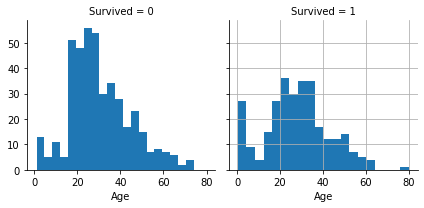

In [45]:

dist=sns.FacetGrid(df,col="Survived")

dist.map(plt.hist,'Age',bins=20)
plt.grid()

 Majority of the Survivors were around 40 and the least Survivors  were  aound 80 and from   10 to 15

Major casulity were around 25 to around 30

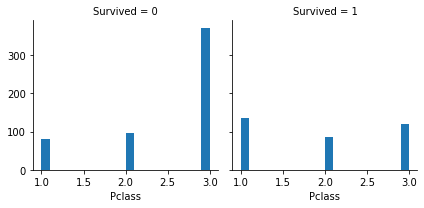

In [54]:
dist1=sns.FacetGrid(df,col='Survived')
dist1.map(plt.hist,'Pclass',bins=20)


It shows that  class 3 was top to number of people who did not Survived followed by class 1 while the number

of casuality was least in class 1

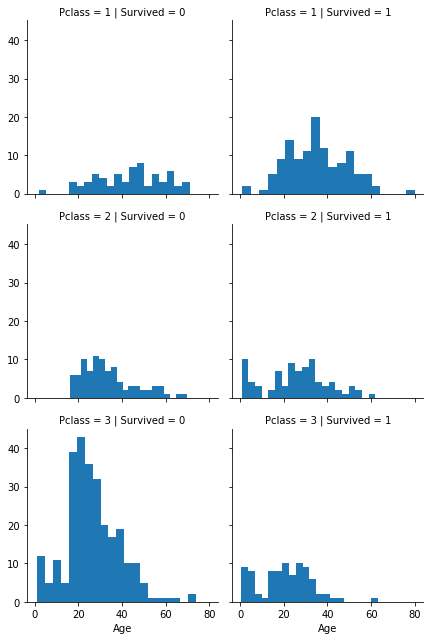

In [50]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', )
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

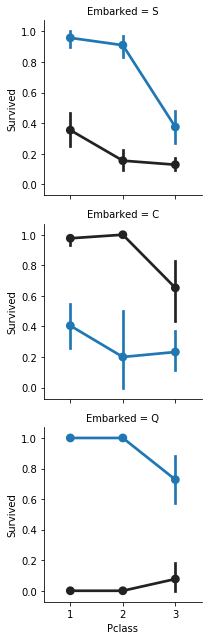

In [58]:
grid1=sns.FacetGrid(df,row='Embarked')
grid1.map(sns.pointplot,'Pclass','Survived','Sex',bins=20)


/home/karimi/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


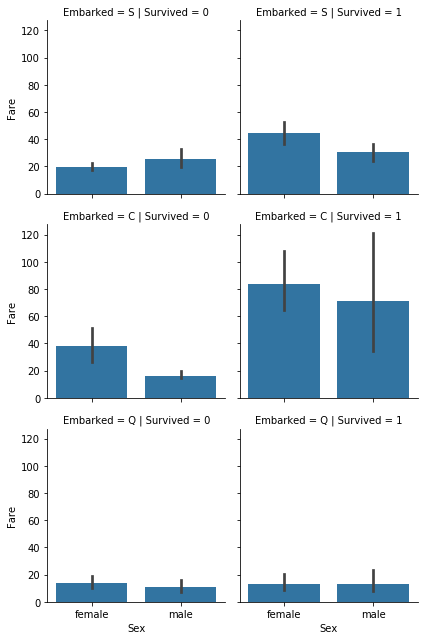

In [60]:
grid2=sns.FacetGrid(df,col='Survived',row='Embarked')
3grid2.map(sns.barplot,'Sex','Fare')

In [64]:
#droping  features which are not corelated to our target
df.drop(['Ticket','Cabin'],axis=1)
# df =df.drop(['Ticket', 'Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [82]:

x=df.iloc[:,:-1]
x.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN


In [83]:
y=df.iloc[:,1]
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [101]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
df['Age'].median()

28.0

In [106]:
df['AGE']  = df['Age'].fillna(28.0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0
